# Using SciPy interpolation functions on date ranges

`scipy.interpolate` methods do not support dates.  If you try to use a datetime object you get this exception:

```
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
```

To overcome this issue, convert dates to numeric (and back) using date.timestamp() method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convert_dates_to_days(dates, start_date=None, name='Day'):
    """Converts a series of dates to a series of float values that
    represent days since start_date.
    """

    if start_date:
        ts0 = pd.Timestamp(start_date).timestamp()
    else:
        ts0 = 0

    return ((dates.apply(pd.Timestamp.timestamp) - ts0)/
            (24*3600)).rename(name)

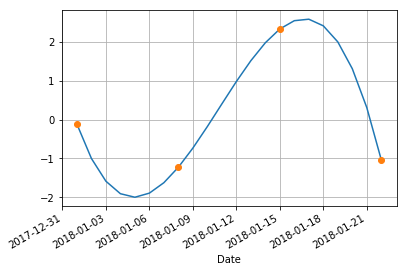

In [3]:
from scipy.interpolate import interp1d

data = pd.DataFrame({
    'Date': pd.date_range('2018-01-01', '2018-01-22', freq='7D'),
    'Value': np.random.randn(4)
})

x = convert_dates_to_days(data.Date, start_date='2018-01-01')
y = data.Value
f2 = interp1d(x, y, kind='cubic')

all_dates = pd.Series(pd.date_range('2018-01-01', '2018-01-22'))
x_all = convert_dates_to_days(all_dates, start_date='2018-01-01')

plt.plot(all_dates, f2(x_all), '-')
data.set_index('Date')['Value'].plot(style='o')
plt.grid()
plt.savefig("interp_demo.png")
plt.show()

See also:

https://stackoverflow.com/questions/27926669/how-do-you-interpolate-from-an-array-containing-datetime-objects/52712019#52712019